# 통계 & NumPy 과제 2024/02/16
데이터 출처 : [서울교통공사_역별 일별 시간대별 승하차인원 정보]
   - https://www.data.go.kr/data/15048032/fileData.do

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 불러오고 싶은 csv 파일의 열 이름만 저장하기
filename='서울교통공사_역별 일별 시간대별 승하차인원 정보_20230930.csv'
cols = pd.read_csv(filename, encoding='euc-kr', nrows=0).columns
cols

Index(['연번', '수송일자', '호선', '역번호', '역명', '승하차구분', '06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후'],
      dtype='object')

In [3]:
# '연번' 제외한 열들 불러오기
seoulsubDF = pd.read_csv(filename, encoding='euc-kr', usecols=cols[1:])
seoulsubDF

,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,2023-01-01,1호선,150,서울역,승차,215,145,231,594,923,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2023-01-01,1호선,150,서울역,하차,154,636,595,939,1306,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,2023-01-01,1호선,151,시청,승차,48,73,106,194,239,...,843,895,959,985,670,630,515,330,146,0
3,2023-01-01,1호선,151,시청,하차,64,247,293,463,522,...,602,575,533,456,285,267,246,154,79,18
4,2023-01-01,1호선,152,종각,승차,407,235,158,201,188,...,1145,1402,1223,1272,911,913,906,602,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,2023-09-30,8호선,2826,수진,하차,8,0,8,40,30,...,195,165,136,171,190,178,132,153,162,133
148791,2023-09-30,8호선,2827,모란,승차,39,0,39,34,54,...,200,189,205,233,219,169,103,137,117,105
148792,2023-09-30,8호선,2827,모란,하차,9,0,9,45,46,...,132,156,164,165,216,215,176,121,113,113
148793,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,54,...,184,211,201,214,182,189,112,131,134,105


In [4]:
# 행 단위, 여러 열들의 합계 구하기
seoulsubDF.loc[:, '총합'] = seoulsubDF.loc[:, '06시이전':'24시이후'].sum(axis=1)
seoulsubDF

,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총합
0,2023-01-01,1호선,150,서울역,승차,215,145,231,594,923,...,2509,2696,2549,2462,2177,2190,1808,734,7,32023
1,2023-01-01,1호선,150,서울역,하차,154,636,595,939,1306,...,2295,2526,1930,1897,1487,991,609,280,46,27044
2,2023-01-01,1호선,151,시청,승차,48,73,106,194,239,...,895,959,985,670,630,515,330,146,0,9317
3,2023-01-01,1호선,151,시청,하차,64,247,293,463,522,...,575,533,456,285,267,246,154,79,18,8300
4,2023-01-01,1호선,152,종각,승차,407,235,158,201,188,...,1402,1223,1272,911,913,906,602,232,3,13019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,2023-09-30,8호선,2826,수진,하차,8,0,8,40,30,...,165,136,171,190,178,132,153,162,133,2101
148791,2023-09-30,8호선,2827,모란,승차,39,0,39,34,54,...,189,205,233,219,169,103,137,117,105,2562
148792,2023-09-30,8호선,2827,모란,하차,9,0,9,45,46,...,156,164,165,216,215,176,121,113,113,2175
148793,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,54,...,211,201,214,182,189,112,131,134,105,2698


In [5]:
# 역 개수는 245개
seoulsubDF['역명'].nunique()

245

In [6]:
# 수송일자와 역명을 기준으로 그룹화하고 이용객수의 총합을 계산 (승차 + 하차)
seoulsubDF2 = seoulsubDF.groupby(['수송일자', '역명']).agg({'총합':'sum'}).reset_index()
seoulsubDF2

,수송일자,역명,총합
0,2023-01-01,가락시장,11728
1,2023-01-01,가산디지털단지,17304
2,2023-01-01,강남,49515
3,2023-01-01,강남구청,6674
4,2023-01-01,강동,14672
...,...,...,...
65264,2023-09-30,홍제,17211
65265,2023-09-30,화곡,23059
65266,2023-09-30,화랑대(서울여대입구),8040
65267,2023-09-30,회현(남대문시장),16857


In [7]:
# DataFrame의 출력을 소수점 이하 3자리로 제한
pd.options.display.precision = 3

In [8]:
# 1. 각 지하철 역별 1일 평균 이용객 수
seoulsubDF3 = seoulsubDF2.groupby(['역명']).agg({'총합':'mean'}).reset_index()
seoulsubDF3

,역명,총합
0,가락시장,32026.740
1,가산디지털단지,75200.634
2,강남,146990.337
3,강남구청,31427.623
4,강동,33684.853
...,...,...
240,홍제,33452.989
241,화곡,52311.458
242,화랑대(서울여대입구),19915.264
243,회현(남대문시장),49852.004


In [9]:
# 2. 각 지하철 역별 이용객수의 표준 편차 (std)
seoulsubDF3.describe()

,총합
count,245.000
mean,34159.372
std,28519.740
min,0.000
25%,16121.403
50%,26413.092
75%,41881.139
max,180893.850


In [10]:
# 3. 가장 많은 이용객이 있는 역의 이용객 수
# 5. 이용객 수가 가장 많은 역의 이름
seoulsubDF3.sort_values(by='총합', ascending=False).iloc[0]

역명     잠실(송파구청)
총합    180893.85
Name: 196, dtype: object

In [11]:
# 4. 가장 적은 이용객이 있는 역의 이용객 수
# 6. 이용객 수가 가장 적은 역의 이름
seoulsubDF3.sort_values(by='총합').iloc[0]

역명    삼산체육관
총합      0.0
Name: 109, dtype: object

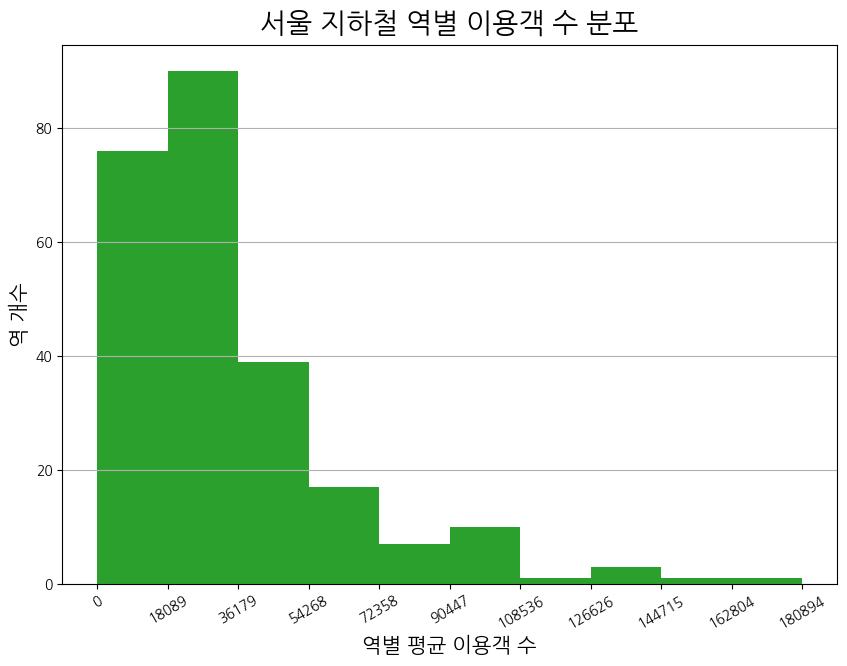

In [12]:
# 7. 이용객 수의 분표를 히스토그램으로 시각화하시오.
import matplotlib.pyplot as plt
import koreanize_matplotlib

BINS = 10
plt.figure(figsize=(10, 7))
plt.hist(seoulsubDF3['총합'], bins=BINS, color='tab:green')
plt.xlabel('역별 평균 이용객 수', fontsize=15)
plt.ylabel('역 개수', fontsize=15)
plt.xticks(np.linspace(0, seoulsubDF3['총합'].max(), BINS + 1), fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.title('서울 지하철 역별 이용객 수 분포', fontsize=20, pad=10)
plt.grid(axis='y')
plt.show()